<a href="https://colab.research.google.com/github/hansschaa/LinearRegression_PCGML/blob/master/LinearRegression_PCGML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sección de código que importa el nivel de juego.

[Nivel 6 - 1 Mario](https://github.com/TheVGLC/VGLC-Examples/blob/master/trainingData/mario-6-1.txt)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Variables depedientes e independientes
# X es un array que contiene las posiciones en X de cada tile
X = np.array([])
# Y es un array que va a contener los Y en los que es encontrado un último tile de suelo para un x dado, ej: f(0) = 1
Y = np.array([])

level = '''
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------XXX------------
----------------------------------------------------------------------------------X--------------------------------------------------------------------------------------XXX------------
---------------------------------------------------------------------------------XXX---------------------------------------------------------X---------------------------XXX------------
--------------------------------------------------------------------------------XXX------------------------------------X--------------------XXX-----------------------XX-XXX------------
----------------------------XXXX---------------------------------XXX------------XXXX----------------------------------XXX------------------XXXX----------------------XXX-XXX------------
-------------------------XXXXX----------------------------------XXXX----------XXXXXX---------------------------------XXXX-----------------XXXXX---------------------XXXX-XXX------------
----------------------XXXXXX-----------------------------------XXXXX---------XXXXXXX--------------------------------XXXXX----------------XXXXXX--------------------XXXXX-XXX------------
-------------------XXXXXXX------------------------------------XXXXXX------------XXXX-------------------------------XXXXXX---------------XXXXXXX-------------------XXXXXX-XXX-------XX---
XXXXXXXXXXXXX--XXXXXXXXX------XX--XXXXXXXXXXXXXXXX--XXXXXXXXXXXXXXX---XXXXXXXXXXXXXXXX---XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX-------XX-XXXXXXXXXXXX------XXXXXXXXX---XXXXXXX--XXXXXXXXXXXXXXX
'''

# dividir el level por lineas
level = level.strip().split('\n')
# definir las dimensiones del nivel
alto = len(level)
largo = len(level[0])

# Matriz para guardar el level
matriz_nivel = []
for i in range(alto):
    fila = []
    for j in range(largo):
        fila.append(level[i][j])
    matriz_nivel.append(fila)

# Boleano para controlar el agregar o no un 0 en el vector Y
added = False

# Guardar las alturas en Y
for j in range(largo):
    added = False
    X = np.append(X,j)
    for i in range(alto):
        if matriz_nivel[i][j] == 'X':
          Y = np.append(Y,alto-i)
          added = True
          break
    if added == False:
      Y = np.append(Y,0)

#print("Y:", Y)


Para sacar la pendiente (w) que más se aproxima a los datos se necesita obtener la covarianza y varianza del conjunto de datos:

*   Covarianza: $S_{XY} = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{n-1}$
*   Varianza: $S_{XX} = \frac{\sum (X_i - \bar{X})^2}{n-1}$

Luego: $w =\frac{S_{XY}}{S_{XX}} $

El intercepto es calculado como:
$ b = \bar{Y} - w \cdot \bar{X} $


Coeficiente w: 0.0036870798096742493
Intercepto b: 1.4669800235017627


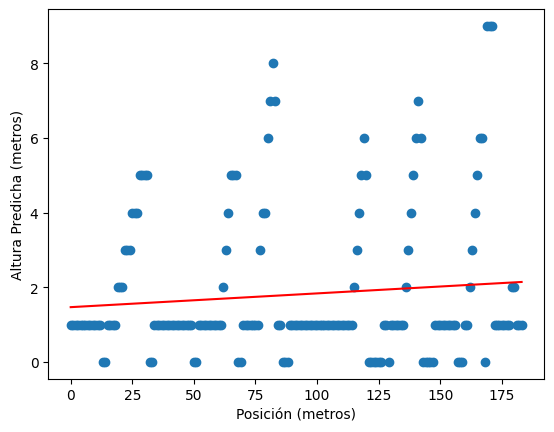

In [2]:
# Datos
#X = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
#Y = np.array([1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0 , 1.0])

# Calcular medias
X_bar = np.mean(X)
Y_bar = np.mean(Y)

# Calcular términos necesarios
numerator = np.sum((X - X_bar) * (Y - Y_bar))
denominator = np.sum((X - X_bar) ** 2)

# Calcular w
w = numerator / denominator

# Calcular b
b = Y_bar - w * X_bar

# Calcular los valores predichos
Y_pred = w * X + b
plt.plot(X, Y_pred, color='red', label='Regresión Lineal')

# Imprimir resultados
print(f"Coeficiente w: {w}")
print(f"Intercepto b: {b}")

# Graficar
plt.scatter(X, Y, label='Altura Predicha')
plt.xlabel('Posición (metros)')
plt.ylabel('Altura Predicha (metros)')
plt.show()

Coeficiente wx: 0.0036870798096742493
Coeficiente wy: 0.7288124220385033
Intercepto b: 0.15194891417141987


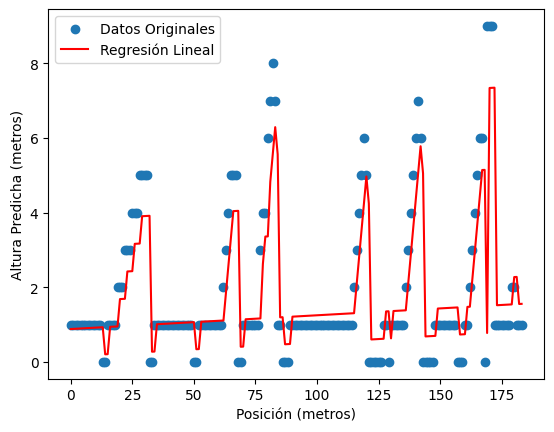

In [5]:
# Datos
#X = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
#Y = np.array([1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0 , 1.0])

# Calcular medias
X_bar = np.mean(X)
Y_bar = np.mean(Y)

# Calcular términos necesarios
numerator_wx = np.sum((X - X_bar) * (Y - Y_bar))
denominator_wx = np.sum((X - X_bar) ** 2)

# Calcular wx
wx = numerator_wx / denominator_wx

# Calcular w_y y y_i-1
# Y[1:] Todos menos el primero
# Y[:-1] Todos menos el último
numerator_wy = np.sum((Y[1:] - Y_bar) * (Y[:-1] - Y_bar))
denominator_wy =np.sum((Y[:-1] - Y_bar) ** 2)

wy = numerator_wy  / denominator_wy

# Calcular b
b = Y_bar - (wx * X_bar) - (wy * Y_bar)

# Calcular los valores predichos
Y_pred = wx * X + wy * np.roll(Y, shift=1) + b

# Imprimir resultados
print(f"Coeficiente wx: {wx}")
print(f"Coeficiente wy: {wy}")
print(f"Intercepto b: {b}")

# Graficar
plt.scatter(X, Y, label='Datos Originales')
plt.plot(X, Y_pred, color='red', label='Regresión Lineal')
plt.xlabel('Posición (metros)')
plt.ylabel('Altura Predicha (metros)')
plt.legend()
plt.show()
